In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, SARIMAX
from sklearn.metrics import mean_squared_error


In [2]:
# Load the dataset
data = pd.read_excel("/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/18/Airlines+Data.xlsx")

In [3]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
data.shape

(96, 2)

In [5]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


# EDA

In [7]:
# Convert the "month" column to a datetime type
data["Month"] = pd.to_datetime(data["Month"])

In [8]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


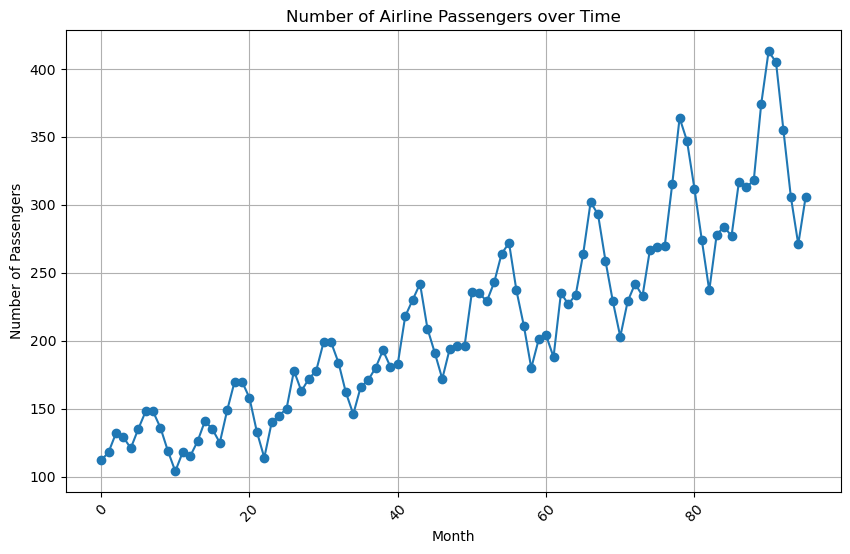

In [9]:
# Plotting the number of airline passengers vs. month
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Passengers"], marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Number of Airline Passengers over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [10]:
# Calculate rolling mean with a window size of 12
rolmean = data.rolling(window=12).mean()

# Calculate rolling standard deviation with a window size of 12
rolstd = data.rolling(window=12).std()

# Print the first 15 rows of rolling mean and rolling standard deviation
print("Rolling Mean:")
print(rolmean.head(15))

print("\nRolling Standard Deviation:")
print(rolstd.head(15))

Rolling Mean:
    Passengers
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11  126.666667
12  126.916667
13  127.583333
14  128.333333

Rolling Standard Deviation:
    Passengers
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11   13.720147
12   13.453342
13   13.166475
14   13.686977


/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_5610/3129000607.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  rolmean = data.rolling(window=12).mean()
/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_5610/3129000607.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  rolstd = data.rolling(window=12).std()


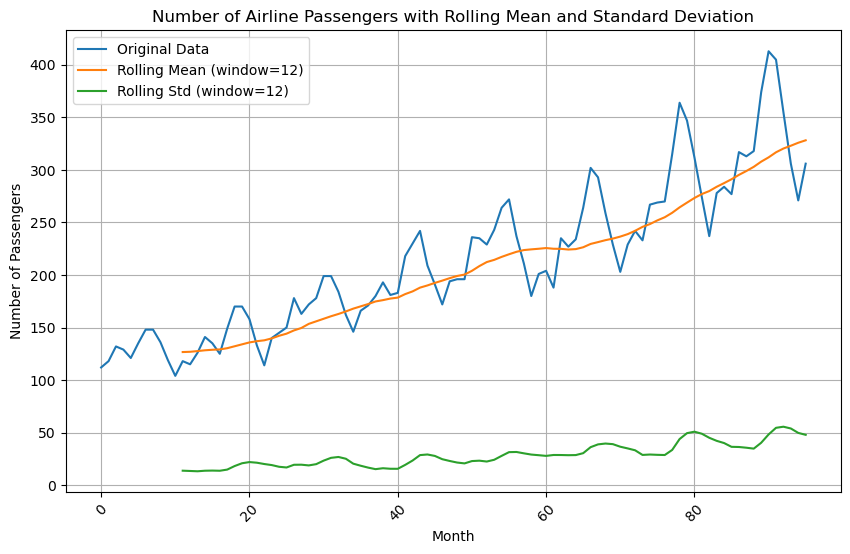

In [11]:
# Plotting the original data, rolling mean, and rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Passengers"], label="Original Data")
plt.plot(rolmean.index, rolmean["Passengers"], label="Rolling Mean (window=12)")
plt.plot(rolstd.index, rolstd["Passengers"], label="Rolling Std (window=12)")

plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Number of Airline Passengers with Rolling Mean and Standard Deviation")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### The rolling standard deviation indicates the variation or volatility in the data around the rolling mean.

In [12]:
#Dickey-Fuller test, a statistical test to check for the stationarity of a time series

from statsmodels.tsa.stattools import adfuller

print('Dickey-Fuller Test:')
dftest = adfuller(data['Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'No. of Observations'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value

print(dfoutput)

Dickey-Fuller Test:
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Observations     83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [13]:
#Check for any missing or invalid values in the 'passengers' column
if data['Passengers'].isnull().any() or not data['Passengers'].dtype == 'float64':
    # If there are missing or non-numeric values, convert 'passengers' column to numeric
    data['Passengers'] = pd.to_numeric(data['Passengers'], errors='coerce')


In [14]:
#Remove any rows with NaN (Not-a-Number) values, if any
data.dropna(subset=['Passengers'], inplace=True)

In [15]:
#Perform the natural logarithm transformation
data_log = np.log(data['Passengers'])

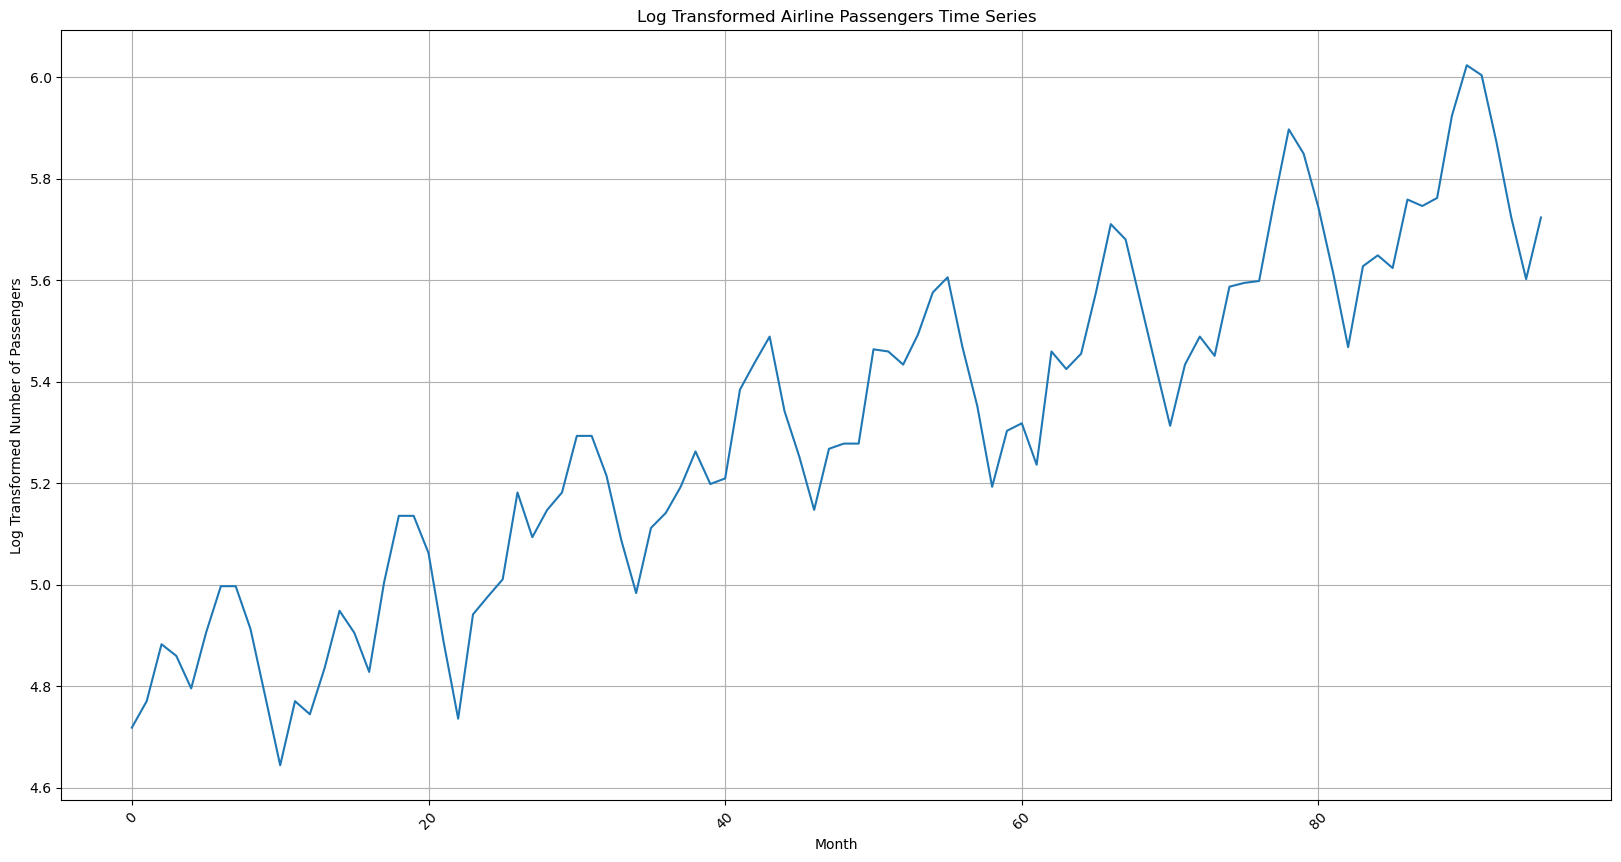

In [16]:
# Plot the log-transformed data
plt.figure(figsize=(20, 10))
plt.plot(data.index, data_log)

plt.xlabel("Month")
plt.ylabel("Log Transformed Number of Passengers")
plt.title("Log Transformed Airline Passengers Time Series")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

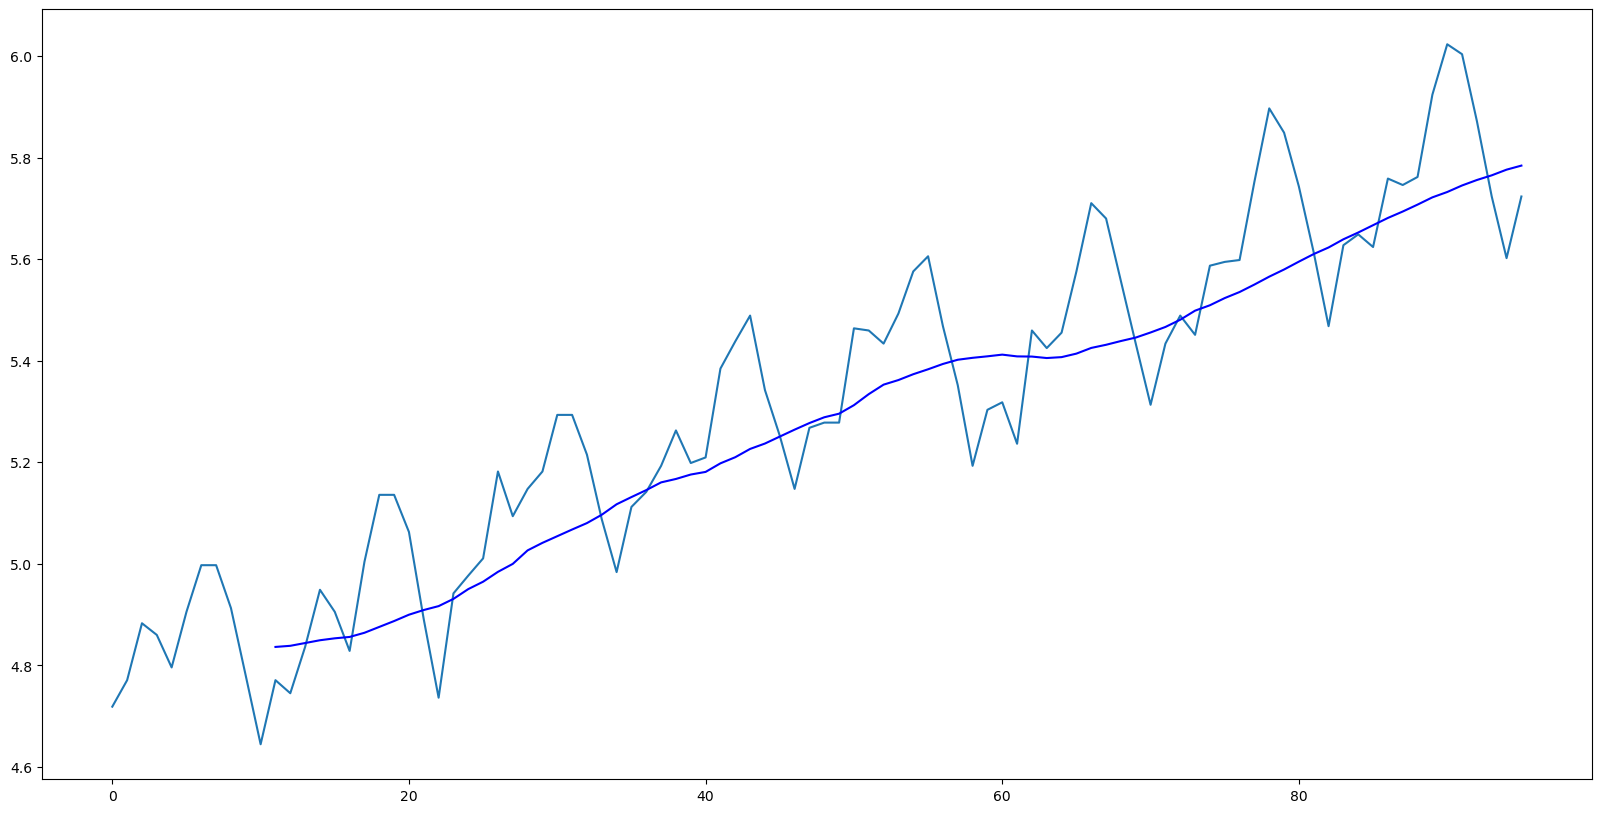

In [17]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [18]:
# Calculate the difference between the log-transformed data and its moving average
data_log_diff = data_log - MAvg

# Display the first 12 rows of the resulting data
print(data_log_diff.head(12))

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11   -0.065494
Name: Passengers, dtype: float64


In [19]:
# Remove any rows with missing values (NaN)
data_log_diff = data_log_diff.dropna()

# Display the first few rows of the resulting data
print(data_log_diff.head())

11   -0.065494
12   -0.093449
13   -0.007566
14    0.099416
15    0.052142
Name: Passengers, dtype: float64


In [20]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    

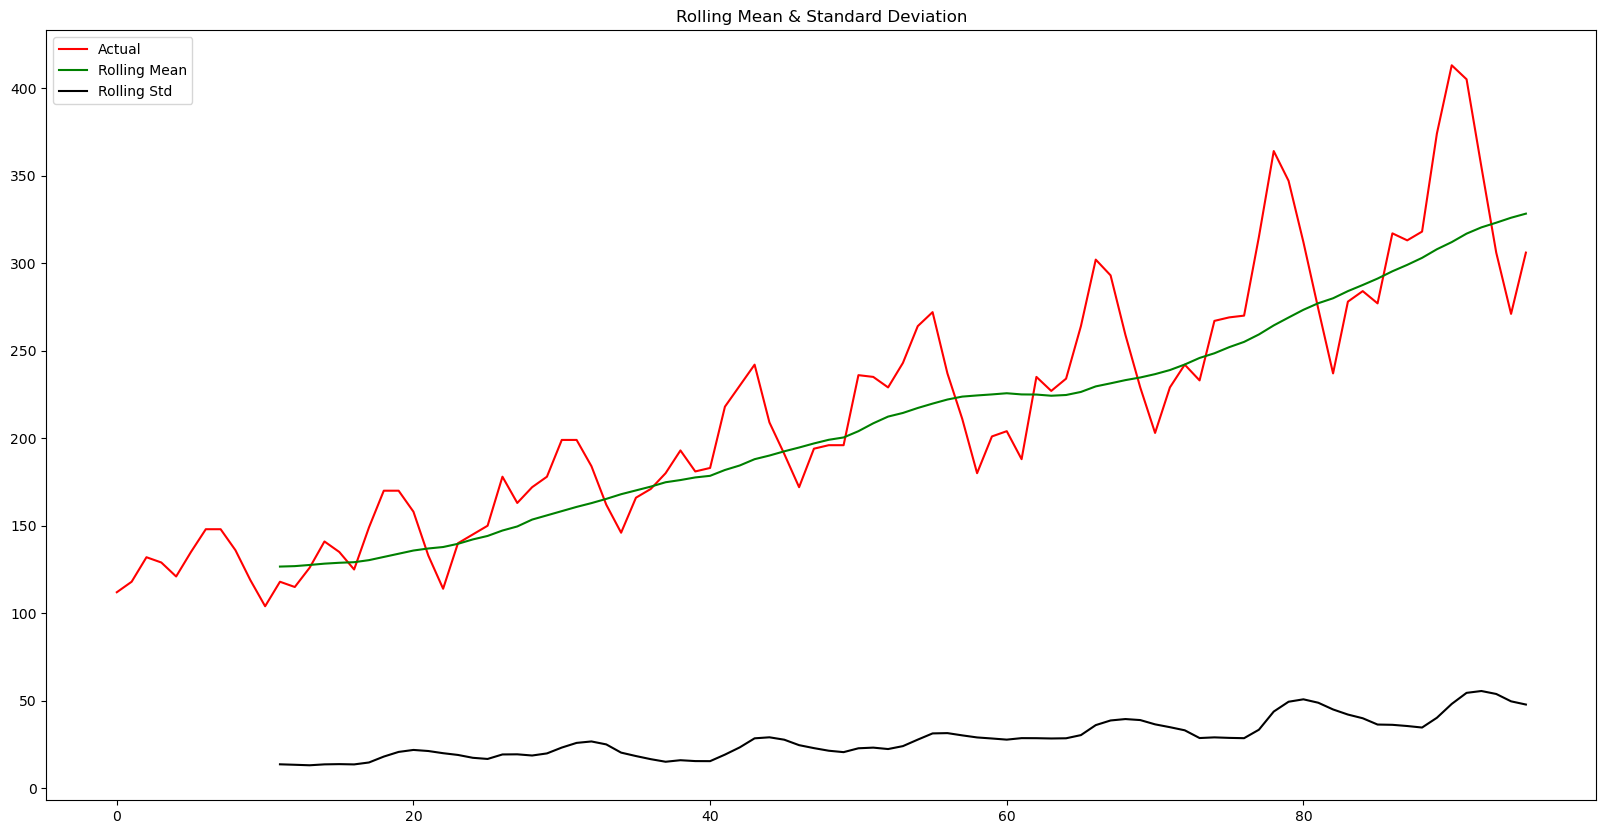

In [21]:
# Call the stationarity function with the 'Passengers' column of the 'data' DataFrame
stationarity(data['Passengers'])

In [22]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [23]:
# Set the 'Month' column as the index
data.set_index('Month', inplace=True)

# Create dummy variables for the months in the 'data' DataFrame index
data_with_dummies = pd.get_dummies(data.index.month, prefix='Month')

# Combine the dummy variables with the 'Passengers' column
data_with_dummies = pd.concat([data_with_dummies, data['Passengers']], axis=1)

# Split the data into training and testing sets (80% for training, 20% for testing)
train_size = int(len(data_with_dummies) * 0.8)
train, test = data_with_dummies.iloc[:train_size], data_with_dummies.iloc[train_size:]

# MODELS

In [24]:
# Extract the 'Passengers' column from the training and testing sets
train_passengers = train['Passengers']
test_passengers = test['Passengers']


In [25]:
train_passengers

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                       ...  
1999-05-01 00:00:00    229.0
1999-06-01 00:00:00    243.0
1999-07-01 00:00:00    264.0
1999-08-01 00:00:00    272.0
1999-09-01 00:00:00    237.0
Name: Passengers, Length: 153, dtype: float64

In [26]:
test_passengers

1999-10-01 00:00:00    211.0
1999-11-01 00:00:00    180.0
1999-12-01 00:00:00    201.0
2000-01-01 00:00:00    204.0
2000-02-01 00:00:00    188.0
2000-03-01 00:00:00    235.0
2000-04-01 00:00:00    227.0
2000-05-01 00:00:00    234.0
2000-06-01 00:00:00    264.0
2000-07-01 00:00:00    302.0
2000-08-01 00:00:00    293.0
2000-09-01 00:00:00    259.0
2000-10-01 00:00:00    229.0
2000-11-01 00:00:00    203.0
2000-12-01 00:00:00    229.0
2001-01-01 00:00:00    242.0
2001-02-01 00:00:00    233.0
2001-03-01 00:00:00    267.0
2001-04-01 00:00:00    269.0
2001-05-01 00:00:00    270.0
2001-06-01 00:00:00    315.0
2001-07-01 00:00:00    364.0
2001-08-01 00:00:00    347.0
2001-09-01 00:00:00    312.0
2001-10-01 00:00:00    274.0
2001-11-01 00:00:00    237.0
2001-12-01 00:00:00    278.0
2002-01-01 00:00:00    284.0
2002-02-01 00:00:00    277.0
2002-03-01 00:00:00    317.0
2002-04-01 00:00:00    313.0
2002-05-01 00:00:00    318.0
2002-06-01 00:00:00    374.0
2002-07-01 00:00:00    413.0
2002-08-01 00:

In [27]:
# Find the first non-NaN index after differencing
first_non_nan_index = train_passengers.first_valid_index()

In [30]:
from pmdarima.arima import auto_arima
# Find the first non-NaN index after differencing
first_non_nan_index = train_passengers.first_valid_index()

# Use auto_arima from pmdarima to find the optimal SARIMA parameters
model = auto_arima(train_passengers.loc[first_non_nan_index:], seasonal=True, m=12, stepwise=True, trace=True)
p, d, q = model.order
P, D, Q, s = model.seasonal_order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=320.878, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=333.222, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=316.789, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=318.674, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=329.448, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=318.777, Time=0.13 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=318.778, Time=0.07 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=319.901, Time=0.05 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=320.767, Time=0.73 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=321.302, Time=0.03 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=318.471, Time=0.06 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=315.829, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=327.769, Time=0.03 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=317.674, Time=0.25 sec
 ARIMA(1,1,1)(1,1,1)[12]         

In [31]:
# Print the selected SARIMA parameters
print("Selected SARIMA Parameters:")
print("p={}, d={}, q={}, P={}, D={}, Q={}, s={}".format(p, d, q, P, D, Q, s))


Selected SARIMA Parameters:
p=0, d=1, q=1, P=1, D=1, Q=0, s=12


In [32]:
# Model 3: SARIMA model
sarima_model = SARIMAX(train_passengers.loc[first_non_nan_index:], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(len(test_passengers))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78131D+00    |proj g|=  7.48678D-02

At iterate    5    f=  2.70664D+00    |proj g|=  7.05315D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   1.276D-06   2.706D+00
  F =   2.7062764670661985     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [33]:
# Model 4: ARIMA model
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train_passengers, order=(p, d, q))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(len(test_passengers))


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [41]:
# Calculate the RMSE values for each model

sarima_rmse = mean_squared_error(test_passengers, sarima_forecast, squared=False)
arima_rmse = mean_squared_error(test_passengers, arima_forecast, squared=False)


In [43]:
# Print the RMSE values for each model
print("RMSE for SARIMA model:", sarima_rmse)
print("RMSE for ARIMA model:", arima_rmse)

RMSE for SARIMA model: 23.932487055623593
RMSE for ARIMA model: 74.74131214055333


In [44]:
# Choose the model with the lowest RMSE as the best model for forecasting
lowest_rmse_model = sarima_rmse
best_model_forecast = sarima_forecast
best_model_name = "SARIMA model"


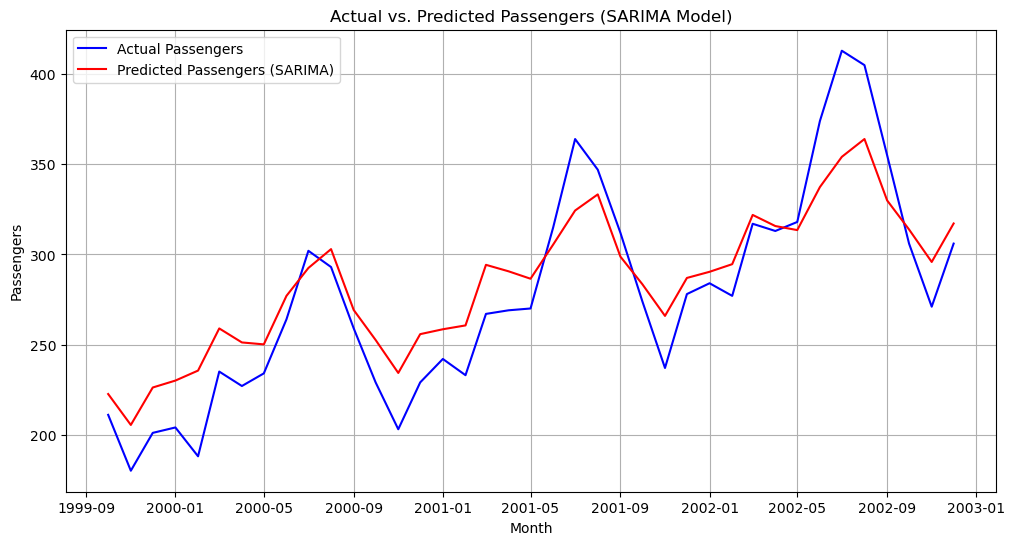

In [45]:
# Plotting actual vs. predicted values for the best model (SARIMA model)
plt.figure(figsize=(12, 6))
plt.plot(test_passengers.index, test_passengers, label="Actual Passengers", color="blue")
plt.plot(test_passengers.index, best_model_forecast, label="Predicted Passengers (SARIMA)", color="red")
plt.title("Actual vs. Predicted Passengers (SARIMA Model)")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()

# Model Validation
#### We'll use the entire dataset to fit the SARIMA model and then use the model to make predictions for the entire dataset

In [46]:
# Split the predictions into training and testing periods
train_forecast = sarima_forecast.iloc[:train_size]
test_forecast = sarima_forecast.iloc[train_size:]


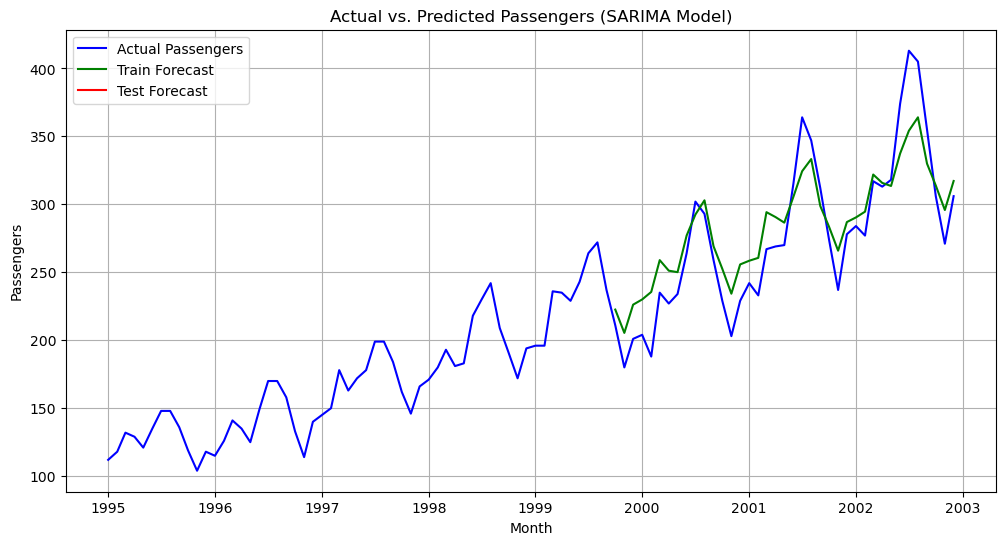

In [47]:
# Plotting actual vs. predicted passengers for the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers'], label="Actual Passengers", color="blue")
plt.plot(train_forecast.index, train_forecast, label="Train Forecast", color="green")
plt.plot(test_forecast.index, test_forecast, label="Test Forecast", color="red")
plt.title("Actual vs. Predicted Passengers (SARIMA Model)")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()

##### The green line closely follows the actual data, indicating that the SARIMA model has been fitted well to the historical data.
##### The SARIMA model captures the seasonal patterns in the data, as evidenced by the regular up and down movements in the forecast. 
##### The model's forecast also captures the overall trend in the data, reflecting the general upward trend in the number of passengers over time. This suggests that the model can effectively account for the long-term growth or decline in the series.

### Overall, the plot shows that the SARIMA model is a good fit for the historical data and is capable of providing reasonable forecasts for future time periods. 